# IUM Projekt - etap 2

Vladyslav Kyryk, Michał Łątkowski

# Zadanie 8

Mamy problemy odpowiednim zapełnianiem półek magazynowych. Nigdy nie wiadomo, co tak naprawdę będzie potrzebne w najbliższym tygodniu, co powinniśmy zamówić. Może da się coś z tym zrobić?”

## Modele

Aplikacja udostępnia dwa modele:
1. Model bazowy oparty na średniej liczbie sztuk/tydzień dla każdego z produktów za cały okres w danych treningowych.
2. Oparty na regresji za pomocą XGBoost model, który jest naszym modelem "zaawansowanym".

### Model 

#### Trening

Model bazowy można wytrenować uruchamiając notebook <em>base_model.ipynb</em>. \
Model zaawansowany można wytrenować uruchamiając notebook <em>xgboost.ipynb</em>.

#### Atrybuty

W celu trenowania do modelu zaawansowanego podaliśmy dane dotyczące:
<ul>
  <li>Ceny produktu</li>
  <li>Kategorii produktu</li>
  <li>Zmienne oparte na dacie (miesiąc, tydzień, rok etc.)</li>
  <li>Średnia miesięczna oraz tygodniowa, obliczone na podstawie danych historycznych</li>
</ul>

#### ARIMA

Pierwotnie planowaliśmy zastosować model ARIMA albo, po późniejszej konkluzji, że ARIMA nie radzi sobie z trendami sezonowymi występującymi w danych, SARIMA. Efekty naszej pracy w tym zakresie można zobaczyć szczegółowo w notebooku <em>arima.ipynb</em>

### Porównanie wyników modeli

#### wykres dla modelu bazowego
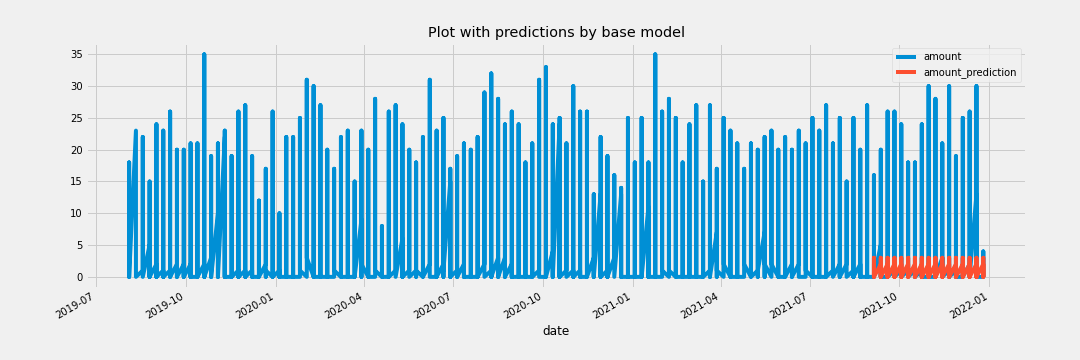

#### wykres dla xgboost
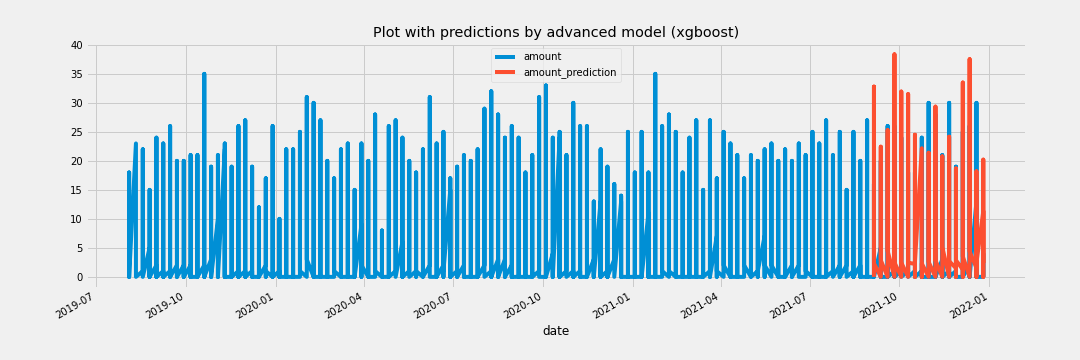

#### wykres dla xgboost z średnimi miesięczną oraz tygodniową
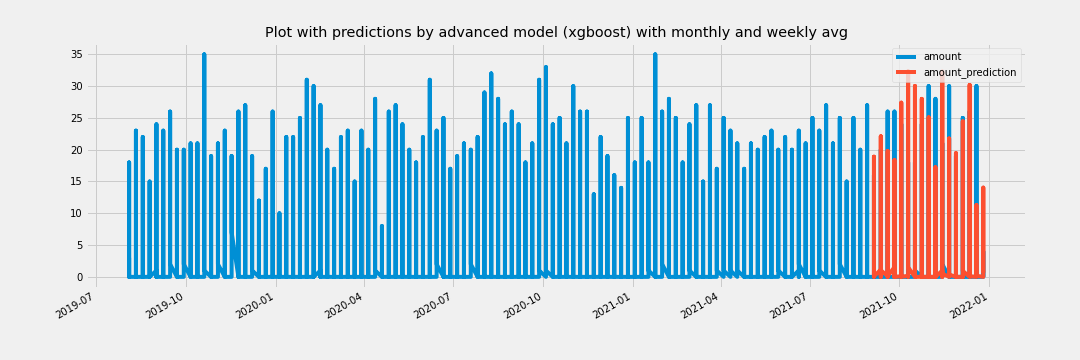

#### Tablelka z metrykami dla każdego z modeli

|  | base | xgboost | xgboost with averages |
| :-: | :-: | :-: | :-: |
| Bias | 0.11 | -0.37 | -0.02 |
| MAE | 0.85 | 1.38 | 1.06 |
| RMSE | 2.66 | 3.93 | 3.55 |


Dodatni bias oznacza, że model ma tendencję niedoszacowania, czyli jest skłonny przewidywać wartości mniejsze, niż są w zbiorze testowym. \
Ujemny bias oznacza,  że model ma tendencję zawyżenia, czyli jest skłonny przewidywać wartości większe, niż są w zbiorze testowym.

MAE - Mean Absolute Error \
RMSE - Root Mean Squared Error

## Mikroserwis

Aplikacja została oparta o bibliotekę Flask. \
Użytkownik wykonuje zapytanie z odpowiednimi parametrami na jeden z endpointów:
<em>/predict/basic_model</em>
albo
<em>/predict/advanced_model</em>. \
W ciele metody GET podajemy dwa parametry - <em>date</em>, w postaci np. "2021-10-21" oraz <em>product_id</em> w postaci np. "1002". \
Aplikacja wczytuje model uprzednio zapisany przez notebook treningowy, pobiera dane bazując na tym co podał użytkownik, przygotowuje te dane (tak żeby model dostał na wejściu dane w formacie, którego się "spodziewa"), a potem aplikacja w obu przypadkach zwraca liczbę całkowitą będącą równą przewidywanej ilości sprzedanych egzemplarzy.

#### Uruchomienie aplikacji

Aplikację można uruchomić, wpisując (jeśli jest się w folderze 'app') python3 application.py.

Przykładowe zapytanie do modelu bazowego: http://127.0.0.1:5000/predict/base_model?product_id=1002 \
Przykładowa odpowiedź modelu bazowego: 2

Przykładowe zapytanie do modelu zaawansowanego: http://127.0.0.1:5000/predict/advanced_model?date=2021-10-21&product_id=1002 \
Przykładowa odpowiedź modelu zaawansowanego: 17

## A/B TESTY

Po każdym odpytywaniu jednego z modelów, aplikacja zapisuje zapytanie, predykcję oraz znacznik czasu do pliku z logami w formacie json. \
Po zebraniu niezbędnej liczby rekordów, one mogą być wykorzystane do analizy oraz oceny jakości modeli.

Przykład rekordu zapisywanego do pliku z logami:
```json
{
    "model_type": "advanced_model",
    "request": {
        "date": "2022-10-21",
        "product_id": "1002"
    },
    "response": 17,
    "timestamp": "13.01.2022, 18:37:43"
}
```